<a href="https://colab.research.google.com/github/vinalyan/diff/blob/master/GeekBrains/algorithms/web6/Lessin6_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используя файл Lesson_6_extended.ipynb (он в web6.zip в материалах)::

1. 
2. * Модифицировать реализованный алгоритм градиентного бустинга, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

# Реализация алгоритма градиентрого бустинга из лекции


In [3]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    
    predictions = np.zeros(X.shape[0])
    for i, x in enumerate(X):
        prediction = 0
        for alg in trees_list:
            prediction += eta * alg.predict([x])[0]
        predictions[i] = prediction
        
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )

    return predictions

In [5]:
#функция ошибки
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

def residual(y, z):
    return - (z - y)

In [26]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
       
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
        trees.append(tree)
        
    return trees #train_errors, test_errors

# Задание 1
Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [27]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [28]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=32)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((309, 10), (133, 10), (309,), (133,))

In [30]:
# Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
train_errors_list = []
test_errors_list = []
eta = 1
max_depth = 5

num_trees = [1, 5, 10, 30, 50]
eta, max_depth, train_errors_list, test_errors_list

(1, 5, [], [])

In [31]:
for n_trees in num_trees:
  trees = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

  train_error = mean_squared_error(y_train, gb_predict(X_train, trees, eta))
  test_errors = mean_squared_error(y_test, gb_predict(X_test, trees, eta))
  train_errors_list.append(train_error)
  test_errors_list.append(test_errors)
  print(f'Кол-во деревьев: {n_trees}, Глубина: {max_depth}, Шаг: {eta}, Ошибка на обуч: {train_error: .3f}, Ошибка на тестовой: {test_errors: .3f}')

Кол-во деревьев: 1, Глубина: 5, Шаг: 1, Ошибка на обуч:  1759.426, Ошибка на тестовой:  3952.008
Кол-во деревьев: 5, Глубина: 5, Шаг: 1, Ошибка на обуч:  670.995, Ошибка на тестовой:  4916.298
Кол-во деревьев: 10, Глубина: 5, Шаг: 1, Ошибка на обуч:  91.211, Ошибка на тестовой:  5395.317
Кол-во деревьев: 30, Глубина: 5, Шаг: 1, Ошибка на обуч:  0.205, Ошибка на тестовой:  5654.593
Кол-во деревьев: 50, Глубина: 5, Шаг: 1, Ошибка на обуч:  0.000, Ошибка на тестовой:  5664.300


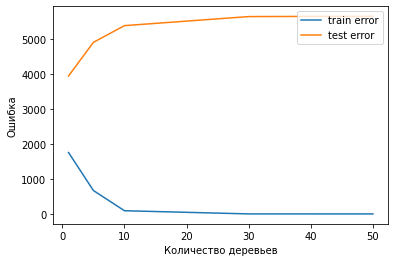

In [32]:
plt.xlabel('Количество деревьев')
plt.ylabel('Ошибка')
plt.plot(num_trees, train_errors_list, label='train error')
plt.plot(num_trees, test_errors_list, label='test error')
plt.legend(loc='upper right')
plt.show()

как-то мгновенно переобучение происходит.

In [33]:
train_errors_list.clear()
test_errors_list.clear()

eta = 1
n_trees = 10
max_depth_list = [1, 5, 7, 10]
eta, train_errors_list, test_errors_list

(1, [], [])

In [34]:
for max_depth in max_depth_list:
  trees = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
  train_error = mean_squared_error(y_train, gb_predict(X_train, trees, eta))
  test_errors = mean_squared_error(y_test, gb_predict(X_test, trees, eta))
  train_errors_list.append(train_error)
  test_errors_list.append(test_errors)
  print(f'Кол-во деревьев: {n_trees}, Глубина: {max_depth}, Шаг: {eta}, Ошибка на обуч: {train_error: .3f}, Ошибка на тестовой: {test_errors: .3f}')

Кол-во деревьев: 10, Глубина: 1, Шаг: 1, Ошибка на обуч:  2807.180, Ошибка на тестовой:  3140.266
Кол-во деревьев: 10, Глубина: 5, Шаг: 1, Ошибка на обуч:  91.211, Ошибка на тестовой:  5395.317
Кол-во деревьев: 10, Глубина: 7, Шаг: 1, Ошибка на обуч:  2.471, Ошибка на тестовой:  5801.346
Кол-во деревьев: 10, Глубина: 10, Шаг: 1, Ошибка на обуч:  0.000, Ошибка на тестовой:  6364.372


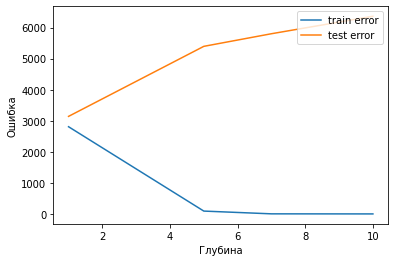

In [35]:
plt.xlabel('Глубина')
plt.ylabel('Ошибка')
#plt.xlim(0, n_trees)
plt.plot(max_depth_list, train_errors_list, label='train error')
plt.plot(max_depth_list, test_errors_list, label='test error')
plt.legend(loc='upper right')
plt.show()

In [36]:
train_errors_list.clear()
test_errors_list.clear()

n_trees = 10
max_depth = 5

eta_list = [0.01, 0.1, 0.5, 1]
max_depth, train_errors_list, test_errors_list

(5, [], [])

In [37]:
for eta in eta_list:
  trees = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
  train_error = mean_squared_error(y_train, gb_predict(X_train, trees, eta))
  test_errors = mean_squared_error(y_test, gb_predict(X_test, trees, eta))
  train_errors_list.append(train_error)
  test_errors_list.append(test_errors)
  print(f'Кол-во деревьев: {n_trees}, Глубина: {max_depth}, Шаг: {eta}, Ошибка на обуч: {train_error: .3f}, Ошибка на тестовой: {test_errors: .3f}')

Кол-во деревьев: 10, Глубина: 5, Шаг: 0.01, Ошибка на обуч:  24765.480, Ошибка на тестовой:  22619.246
Кол-во деревьев: 10, Глубина: 5, Шаг: 0.1, Ошибка на обуч:  4799.702, Ошибка на тестовой:  5460.605
Кол-во деревьев: 10, Глубина: 5, Шаг: 0.5, Ошибка на обуч:  260.980, Ошибка на тестовой:  3484.633
Кол-во деревьев: 10, Глубина: 5, Шаг: 1, Ошибка на обуч:  91.211, Ошибка на тестовой:  5395.317


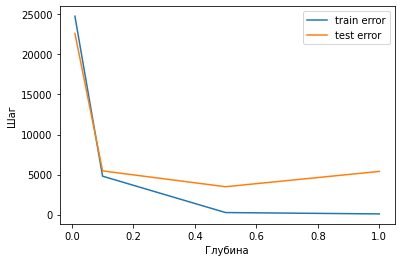

In [38]:
plt.xlabel('Глубина')
plt.ylabel('Шаг')
#plt.xlim(0, n_trees)
plt.plot(eta_list, train_errors_list, label='train error')
plt.plot(eta_list, test_errors_list, label='test error')
plt.legend(loc='upper right')
plt.show()